In [2]:
import pandas as pd

data = pd.read_csv('nbagames.csv', header='infer' ) 

data.index = data['Date']
data = data.drop(['Date'],axis=1)
data = data.drop(['Team'],axis=1)
data = data.drop(['Home'],axis=1)
data = data.drop(['Opponent'],axis=1)
data = data.drop(['WINorLOSS'],axis=1)

data = data.drop(['FieldGoalsAttempted'],axis=1)
data = data.drop(['FieldGoals.'],axis=1)
data = data.drop(['X3PointShots'],axis=1)
data = data.drop(['X3PointShotsAttempted'],axis=1)
data = data.drop(['X3PointShots.'],axis=1)
data = data.drop(['FreeThrows'],axis=1)
data = data.drop(['FreeThrowsAttempted'],axis=1)
data = data.drop(['FreeThrows.'],axis=1)
data = data.drop(['OffRebounds'],axis=1)
data = data.drop(['TotalRebounds'],axis=1)
data = data.drop(['Assists'],axis=1)
data = data.drop(['Steals'],axis=1)
data = data.drop(['Blocks'],axis=1)
data = data.drop(['Turnovers'],axis=1)
data = data.drop(['TotalFouls'],axis=1)
data = data.drop(['Opp.FieldGoals'],axis=1)
data = data.drop(['Opp.FieldGoalsAttempted'],axis=1)
data = data.drop(['Opp.FieldGoals.'],axis=1)
data = data.drop(['Opp.3PointShots'],axis=1)
data = data.drop(['Opp.3PointShotsAttempted'],axis=1)
data = data.drop(['Opp.3PointShots.'],axis=1)
data = data.drop(['Opp.FreeThrows'],axis=1)
data = data.drop(['Opp.FreeThrowsAttempted'],axis=1)
data = data.drop(['Opp.FreeThrows.'],axis=1)
data = data.drop(['Opp.OffRebounds'],axis=1)
data = data.drop(['Opp.Assists'],axis=1)
data = data.drop(['Opp.Steals'],axis=1)
data = data.drop(['Opp.Blocks'],axis=1)
data = data.drop(['Opp.Turnovers'],axis=1)
data = data.drop(['Opp.TotalFouls'],axis=1)
data = data.drop(['Opp.TotalRebounds'],axis=1)

data.head()



,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals
Date,,,,,
2014-10-29,1,1,NaN,109,40
2014-11-01,2,2,102.0,92,35
2014-11-05,3,3,NaN,94,38
2014-11-07,4,4,119.0,122,43
2014-11-08,5,5,103.0,96,33


In [3]:
import numpy as np

N,d = data.shape
delta = pd.DataFrame(100*np.divide(data.iloc[1:,:].values-data.iloc[:N-1,:].values, data.iloc[:N-1,:].values),
                    columns=data.columns, index=data.iloc[1:].index)
delta.head()




,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals
Date,,,,,
2014-11-01,100.000000,100.000000,NaN,-15.596330,-12.500000
2014-11-05,50.000000,50.000000,NaN,2.173913,8.571429
2014-11-07,33.333333,33.333333,NaN,29.787234,13.157895
2014-11-08,25.000000,25.000000,-13.445378,-21.311475,-23.255814
2014-11-10,20.000000,20.000000,-11.650485,-11.458333,-18.181818


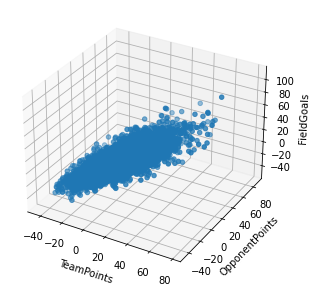

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,5)).gca(projection='3d')
fig.scatter(delta.TeamPoints,delta.OpponentPoints,delta.FieldGoals)
fig.set_xlabel('TeamPoints')
fig.set_ylabel('OpponentPoints')
fig.set_zlabel('FieldGoals')
plt.show()

In [6]:
meanValue = delta.mean()
covValue = delta.cov()
print(meanValue)
print(covValue)

Unnamed: 0        28.990014
Game               4.876412
TeamPoints         1.180083
OpponentPoints     1.216805
FieldGoals         1.530973
dtype: float64
                  Unnamed: 0        Game  TeamPoints  OpponentPoints  \
Unnamed: 0      25632.466370  210.797852  -62.368012      -29.642918   
Game              210.797852  293.391363   -0.720229       -0.507598   
TeamPoints        -62.368012   -0.720229  244.289790       77.429453   
OpponentPoints    -29.642918   -0.507598   77.429453      251.092378   
FieldGoals        -41.335328    2.600171  232.298034       66.175478   

                FieldGoals  
Unnamed: 0      -41.335328  
Game              2.600171  
TeamPoints      232.298034  
OpponentPoints   66.175478  
FieldGoals      319.757558  


In [11]:
from numpy.linalg import inv

X = delta.as_matrix()
S = covValue.as_matrix()
for i in range(3):
    X[:,i] = X[:,i] - meanValue[i]
    
def mahalanobis(row):
    return np.matmul(row,S).dot(row)   
    
anomaly_score = np.apply_along_axis( mahalanobis, axis=1, arr=X)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.TeamPoints,delta.OpponentPoints,delta.FieldPoints,c=anomaly_score,cmap='jet')
ax.set_xlabel('TeamPoints')
ax.set_ylabel('OpponetnPoints')
ax.set_zlabel('FieldPoints')
fig.colorbar(p)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [12]:
anom = pd.DataFrame(anomaly_score, index=delta.index, columns=['Anomaly score'])
result = pd.concat((delta,anom), axis=1)
result.nlargest(2,'Anomaly score')

NameError: name 'anomaly_score' is not defined

Text(0, 0.5, 'Percent Change')

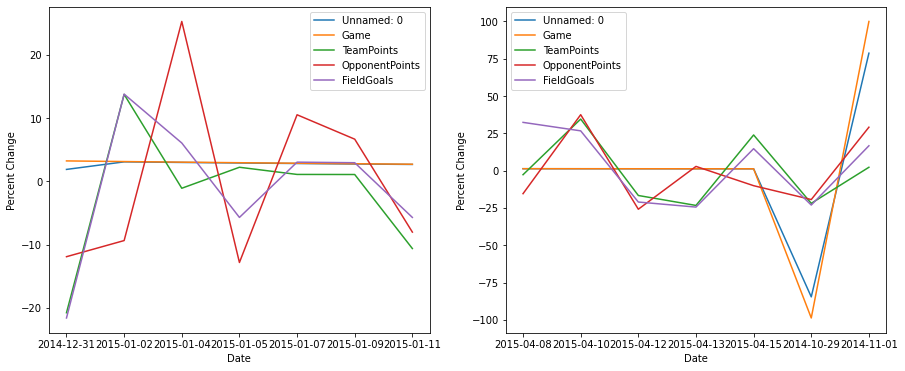

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ts = delta[440:447]
ts.plot.line(ax=ax1)
ax1.set_xticks(range(7))
ax1.set_xticklabels(ts.index)
ax1.set_ylabel('Percent Change')

ts = delta[568:575]
ts.plot.line(ax=ax2)
ax2.set_xticks(range(7))
ax2.set_xticklabels(ts.index)
ax2.set_ylabel('Percent Change')